In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
import pandas as pd
from pyert.pyert_core.analytic_geometric_factor import analytic_geometric_factor as geom_fact
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics.ert import createERTData
from pygimli.physics.ert import simulate as simulateERT

In [2]:
from pyert.pyert_core import sequences

In [3]:
seq_filename='surveys/Test_forward_inversions/sequences/test_seq.txt'

Get sequence and electrode positions

In [4]:
seq, pos = sequences.read_sequence(seq_filename)
seq = np.array(seq)
pos = {i[0]:[i[1], i[3]] for i in pos}

In [5]:
show_args = {'cMap':'Spectral_r', 'cMin':5., 'cMax':50., 'showMesh':True, 'colorBar':True,}

In [6]:
background = mt.createPolygon([(0,0),(5,0),(5,-8),(0,-8)], isClosed= True, marker=1)

In [7]:
anomaly = mt.createPolygon([(2.,-5),(2.,-2), (3.,-2.5),(3.,-4.5)], isClosed=True,
                         addNodes=2, interpolate='spline', marker=5)

In [8]:
for k,v in pos.items():
    background.createNodeWithCheck(v)

In [42]:
elecs = np.array([v for _, v in pos.items()])

## Create the mesh

/home/su533162/miniconda3/envs/pg/lib/python3.7/site-packages/pygimli/viewer/mpl/colorbar.py:434: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  mappable.get_cmap().set_bad([1.0, 1.0, 1.0, 0.0])


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fe0702a4e50>)

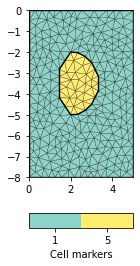

In [71]:
mesh = pg.meshtools.createMesh(background+anomaly, area=.125)
pg.show(mesh,markers=True, showMesh=True)

In [72]:
def material_properties(mesh):
    rho = np.zeros(mesh.cellCount())
    cond = (np.array(mesh.cellCenters())[:,1]>-3.7) & (np.array(mesh.cellMarkers()==1))
    rho[cond] = np.exp(np.random.normal(3.22,.2,len(rho[cond])))
    cond = (np.array(mesh.cellCenters())[:,1]<=-3.7) & (np.array(mesh.cellMarkers()==1))
    rho[cond] = np.exp(np.random.normal(2.08,.2,len(rho[cond])))
    cond = np.array(mesh.cellMarkers()==5)
    rho[cond] = np.exp(np.random.normal(4.08,.3,len(rho[cond])))
    return rho

/home/su533162/miniconda3/envs/pg/lib/python3.7/site-packages/pygimli/viewer/mpl/colorbar.py:434: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  mappable.get_cmap().set_bad([1.0, 1.0, 1.0, 0.0])


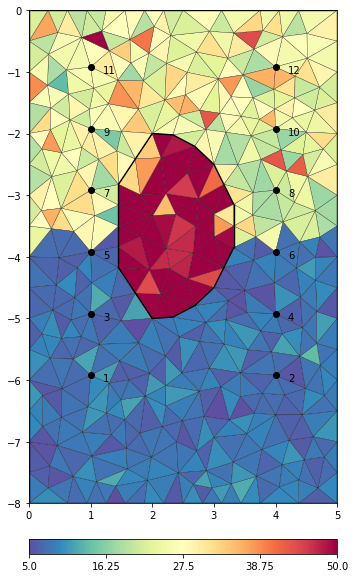

In [73]:
fig, ax = plt.subplots(figsize=(16, 10))
pg.show(mesh, material_properties(mesh), ax=ax, logScale=False, showLater=True, **show_args)
ax.plot(elecs[:,0], elecs[:,1], 'ok')
ax.set_ylim([-8, 0])
j=0
for k,v in pos.items():
    ax.text(v[0]+0.2, v[1]-0.1, f'{k:.0f}')
    j+=1

## Create the data container

In [46]:
scheme = pg.DataContainerERT()

In [47]:
scheme.setSensors(elecs)

Convert sequence of electrodes to sequence of positions

In [48]:
pos_seq = []
for s in seq:
    l=[]
    for i in [pos[x] for x in s]:
        j= i.copy()
        j.append(0)
        l.append(j)
    pos_seq.append(l)
pos_seq

[[[1.0, -5.92, 0], [4.0, -5.92, 0], [1.0, -4.92, 0], [4.0, -4.92, 0]],
 [[1.0, -5.92, 0], [4.0, -5.92, 0], [4.0, -4.92, 0], [1.0, -3.92, 0]],
 [[1.0, -5.92, 0], [4.0, -5.92, 0], [1.0, -3.92, 0], [4.0, -3.92, 0]],
 [[1.0, -5.92, 0], [4.0, -5.92, 0], [4.0, -3.92, 0], [1.0, -2.92, 0]],
 [[1.0, -5.92, 0], [4.0, -5.92, 0], [1.0, -2.92, 0], [4.0, -2.92, 0]],
 [[1.0, -5.92, 0], [1.0, -4.92, 0], [4.0, -5.92, 0], [4.0, -4.92, 0]],
 [[1.0, -5.92, 0], [1.0, -4.92, 0], [4.0, -4.92, 0], [4.0, -3.92, 0]],
 [[1.0, -5.92, 0], [1.0, -4.92, 0], [4.0, -3.92, 0], [1.0, -3.92, 0]],
 [[1.0, -5.92, 0], [1.0, -4.92, 0], [1.0, -3.92, 0], [1.0, -2.92, 0]],
 [[1.0, -5.92, 0], [1.0, -4.92, 0], [1.0, -2.92, 0], [4.0, -3.92, 0]],
 [[1.0, -5.92, 0], [1.0, -4.92, 0], [4.0, -3.92, 0], [4.0, -2.92, 0]],
 [[1.0, -5.92, 0], [1.0, -4.92, 0], [4.0, -2.92, 0], [4.0, -1.92, 0]],
 [[1.0, -5.92, 0], [1.0, -4.92, 0], [4.0, -1.92, 0], [1.0, -1.92, 0]],
 [[1.0, -5.92, 0], [1.0, -4.92, 0], [1.0, -1.92, 0], [1.0, -0.92, 0]],
 [[1.0

Compute the geometric factors 

In [49]:
k = [geom_fact(np.array(l), np.array([0., 1., 0., 0.])) for l in pos_seq]

Insert sequence into the data container

In [50]:
scheme.resize(len(seq))

In [51]:
scheme.add('a', seq[:,0]-1)
scheme.add('b', seq[:,1]-1)
scheme.add('m', seq[:,2]-1)
scheme.add('n', seq[:,3]-1)
scheme.add('k', k)
scheme.set('valid', np.ones(len(seq)))

In [52]:
l = ['a','b','m','n']
for i in l:
    print(np.min(np.array(scheme.get(i))), np.max(np.array(scheme.get(i))))

0.0 11.0
0.0 11.0
0.0 11.0
0.0 11.0


In [53]:
seq_id = 0
seq_txt = f'{seq_id} - '
for i in l:
    seq_txt += f'{i}: {np.array(scheme.get(i))[seq_id]}'
print(seq_txt)

0 - a: 0.0b: 1.0m: 2.0n: 3.0


Create and display forward mesh

/home/su533162/miniconda3/envs/pg/lib/python3.7/site-packages/pygimli/viewer/mpl/colorbar.py:434: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  mappable.get_cmap().set_bad([1.0, 1.0, 1.0, 0.0])


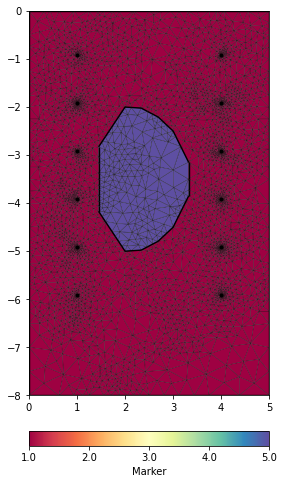

In [54]:
for s in scheme.sensors():
    mesh.createNode(s + [0.01, -0.02])

# Now we can create our forward modeling mesh.
fw_mesh = mt.createMesh(mesh, quality=31)

fig, ax = plt.subplots(figsize=(16, 8))
pg.show(fw_mesh, ax=ax, data=fw_mesh.cellMarkers(), label='Marker', showMesh=True, cMap='Spectral')
ax.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], '.k')

Populate the mesh with resistivites drawn from two distrbutions

/home/su533162/miniconda3/envs/pg/lib/python3.7/site-packages/pygimli/viewer/mpl/colorbar.py:434: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  mappable.get_cmap().set_bad([1.0, 1.0, 1.0, 0.0])


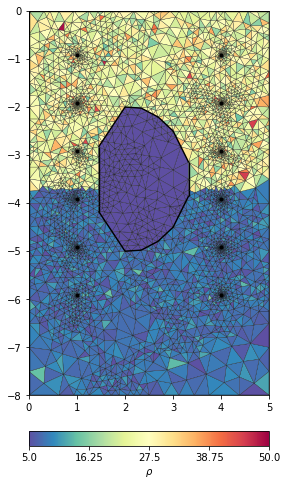

In [55]:
fig, ax = plt.subplots(figsize=(16, 8))
pg.show(fw_mesh, ax=ax, data=material_properties(fw_mesh), label=r'$\rho$', **show_args)
ax.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], '.k')

Simulate apparent resistivities

In [56]:
data = simulateERT(fw_mesh, res=material_properties(fw_mesh), scheme=scheme, verbose=True, noiseLevel=0.001, noiseAbs=1.e-6)

Data error estimate (min:max)  0.0010002843806565598 : 0.30109208847301355


In [57]:
def DataContainerERT_to_df(data_container):
    cols = np.array(data_container.dataMap())[:,0]
    data = np.vstack([data_container.get(i) for i in cols]).T
    df = pd.DataFrame(data=data, columns=cols)
    return df

In [58]:
df = DataContainerERT_to_df(data)

Insert an error on the simulated apparent resistivites

In [59]:
df['err'] = 0.01 * df['rhoa']

In [60]:
df

,a,b,err,i,ip,iperr,k,m,n,r,rhoa,u,valid
0,0.0,1.0,0.092824,0.0,0.0,0.0,9.144309,2.0,3.0,0.0,9.282437,0.0,1.0
1,0.0,1.0,0.094117,0.0,0.0,0.0,-13.746033,3.0,4.0,0.0,9.411740,0.0,1.0
2,0.0,1.0,0.096875,0.0,0.0,0.0,27.671023,4.0,5.0,0.0,9.687531,0.0,1.0
3,0.0,1.0,0.097640,0.0,0.0,0.0,-37.999430,5.0,6.0,0.0,9.764037,0.0,1.0
4,0.0,1.0,0.082891,0.0,0.0,0.0,60.630019,6.0,7.0,0.0,8.289101,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,11.0,10.0,0.079505,0.0,0.0,0.0,48.846999,5.0,4.0,0.0,7.950456,0.0,1.0
340,11.0,10.0,0.178387,0.0,0.0,0.0,-30.914965,4.0,7.0,0.0,17.838724,0.0,1.0
341,11.0,10.0,0.196759,0.0,0.0,0.0,22.613434,7.0,6.0,0.0,19.675924,0.0,1.0
342,11.0,10.0,0.259124,0.0,0.0,0.0,-11.725995,6.0,9.0,0.0,25.912397,0.0,1.0


Update the data container

In [61]:
data.set('err', pg.core.asvector(df['err']))

do not use asvector(ndarray) use ndarray directly .. this method will be removed soon


## Invert the simulated dataset

In [62]:
ert = pg.physics.ERTManager(sr=False, useBert=True, verbose=True, debug=False)

Create on inversion mesh

In [63]:
from pygimli.meshtools import appendTriangleBoundary, merge2Meshes

In [64]:
for cell in mesh.cells():
    cell.setMarker(1)

/home/su533162/miniconda3/envs/pg/lib/python3.7/site-packages/pygimli/viewer/mpl/colorbar.py:434: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  mappable.get_cmap().set_bad([1.0, 1.0, 1.0, 0.0])


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fe07123bd90>)

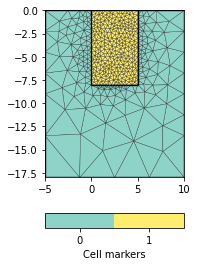

In [65]:
inv_mesh = appendTriangleBoundary(mesh, -10., 10., quality=31, smooth=True,
                              marker=0, isSubSurface=True)

pg.show(inv_mesh, markers=True, showMesh=True)

model = []
phi = []
for lam in np.arange(.1, 3.1, .1):
    model.append(ert.invert(data=data, mesh=inv_mesh, lam=lam))
    phi.append([ert.inv.phiData(), ert.inv.phiModel()])

phi = np.array(phi)

fig, ax = plt.subplots(figsize=(12,12))
ax.plot(phi[:,0], phi[:,1], '-k')
ax.plot(phi[:,0], phi[:,1], 'ok')
lams = np.arange(.1, 3.1, .1)
for i in range(len(lams)):
    ax.text(phi[i,0]+0.2, phi[i,1], f'{lams[i]:.1f}')
ax.set_xlabel('data misfit')
ax.set_ylabel('model misfit')

In [66]:
phi=[]
lam_range = np.arange(1, -1.2, -0.5)

In [36]:
for l in lam_range:
    lam = 10**l
    ert.invert(data=data, mesh=inv_mesh,lam=lam)
    phi.append([ert.inv.phiData(), ert.inv.phiModel()])

02/12/20 - 13:57:23 - pyGIMLi - INFO - Found 2 regions.
02/12/20 - 13:57:23 - pyGIMLi - INFO - Region with smallest marker set to background (marker=0)
02/12/20 - 13:57:23 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/12/20 - 13:57:23 - Core - WARNING - Region Nr: 0  is background and should not get a model transformation.
02/12/20 - 13:57:23 - Core - WARNING - Region Nr: 0  is background and should not get a model control.
02/12/20 - 13:57:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/12/20 - 13:57:23 - pyGIMLi - INFO - Starting inversion.
02/12/20 - 13:57:23 - pyGIMLi - INFO - Set default startmodel to median(data values)=25.356149633592032
02/12/20 - 13:57:23 - pyGIMLi - INFO - Created startmodel from forward operator: 532 [25.356149633592032,...,25.356149633592032]


<class 'pygimli.physics.ert.ert.ERTManager'>.applyMesh(methodManager.py:647) : Mesh: Nodes: 431 Cells: 822 Boundaries: 1252
fop: <pygimli.physics.ert.ert.ERTModelling object at 0x7fe07bdae4f0>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x7fe07bdae130>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x7fe07bdae870>
min/max (data): 7.88/193
min/max (error): 7.88%/193%
min/max (start model): 25.36/25.36
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... 

02/12/20 - 13:57:32 - pyGIMLi - INFO - Found 2 regions.
02/12/20 - 13:57:32 - pyGIMLi - INFO - Region with smallest marker set to background (marker=0)
02/12/20 - 13:57:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/12/20 - 13:57:32 - Core - WARNING - Region Nr: 0  is background and should not get a model transformation.
02/12/20 - 13:57:32 - Core - WARNING - Region Nr: 0  is background and should not get a model control.
02/12/20 - 13:57:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/12/20 - 13:57:32 - pyGIMLi - INFO - Starting inversion.
02/12/20 - 13:57:32 - pyGIMLi - INFO - Set default startmodel to median(data values)=25.356149633592032
02/12/20 - 13:57:32 - pyGIMLi - INFO - Created startmodel from forward operator: 532 [25.356149633592032,...,25.356149633592032]


chi² = 0.5 (dPhi = 8.74%) lam: 10.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.50)                   #
################################################################################
<class 'pygimli.physics.ert.ert.ERTManager'>.applyMesh(methodManager.py:647) : Mesh: Nodes: 431 Cells: 822 Boundaries: 1252
fop: <pygimli.physics.ert.ert.ERTModelling object at 0x7fe07bdae4f0>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x7fe07bdae130>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x7fe07bdae870>
min/max (data): 7.88/193
min/max (error): 7.88%/193%
min/max (start model): 25.36/25.36
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... 

02/12/20 - 13:57:43 - pyGIMLi - INFO - Found 2 regions.
02/12/20 - 13:57:43 - pyGIMLi - INFO - Region with smallest marker set to background (marker=0)
02/12/20 - 13:57:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/12/20 - 13:57:43 - Core - WARNING - Region Nr: 0  is background and should not get a model transformation.
02/12/20 - 13:57:43 - Core - WARNING - Region Nr: 0  is background and should not get a model control.
02/12/20 - 13:57:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/12/20 - 13:57:43 - pyGIMLi - INFO - Starting inversion.
02/12/20 - 13:57:43 - pyGIMLi - INFO - Set default startmodel to median(data values)=25.356149633592032
02/12/20 - 13:57:43 - pyGIMLi - INFO - Created startmodel from forward operator: 532 [25.356149633592032,...,25.356149633592032]


chi² = 0.43 (dPhi = 12.82%) lam: 3.1622776601683795


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.43)                   #
################################################################################
<class 'pygimli.physics.ert.ert.ERTManager'>.applyMesh(methodManager.py:647) : Mesh: Nodes: 431 Cells: 822 Boundaries: 1252
fop: <pygimli.physics.ert.ert.ERTModelling object at 0x7fe07bdae4f0>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x7fe07bdae130>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x7fe07bdae870>
min/max (data): 7.88/193
min/max (error): 7.88%/193%
min/max (start model): 25.36/25.36
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... 

02/12/20 - 13:57:55 - pyGIMLi - INFO - Found 2 regions.
02/12/20 - 13:57:55 - pyGIMLi - INFO - Region with smallest marker set to background (marker=0)
02/12/20 - 13:57:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/12/20 - 13:57:55 - Core - WARNING - Region Nr: 0  is background and should not get a model transformation.
02/12/20 - 13:57:55 - Core - WARNING - Region Nr: 0  is background and should not get a model control.
02/12/20 - 13:57:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/12/20 - 13:57:55 - pyGIMLi - INFO - Starting inversion.
02/12/20 - 13:57:55 - pyGIMLi - INFO - Set default startmodel to median(data values)=25.356149633592032
02/12/20 - 13:57:55 - pyGIMLi - INFO - Created startmodel from forward operator: 532 [25.356149633592032,...,25.356149633592032]


chi² = 0.56 (dPhi = 24.29%) lam: 1.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.56)                   #
################################################################################
<class 'pygimli.physics.ert.ert.ERTManager'>.applyMesh(methodManager.py:647) : Mesh: Nodes: 431 Cells: 822 Boundaries: 1252
fop: <pygimli.physics.ert.ert.ERTModelling object at 0x7fe07bdae4f0>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x7fe07bdae130>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x7fe07bdae870>
min/max (data): 7.88/193
min/max (error): 7.88%/193%
min/max (start model): 25.36/25.36
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.45 (dPhi = 11.6%) lam: 0.31622776601683794
-------------------------------------------

02/12/20 - 13:58:16 - pyGIMLi - INFO - Found 2 regions.
02/12/20 - 13:58:16 - pyGIMLi - INFO - Region with smallest marker set to background (marker=0)
02/12/20 - 13:58:16 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/12/20 - 13:58:17 - Core - WARNING - Region Nr: 0  is background and should not get a model transformation.
02/12/20 - 13:58:17 - Core - WARNING - Region Nr: 0  is background and should not get a model control.
02/12/20 - 13:58:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/12/20 - 13:58:17 - pyGIMLi - INFO - Starting inversion.
02/12/20 - 13:58:17 - pyGIMLi - INFO - Set default startmodel to median(data values)=25.356149633592032
02/12/20 - 13:58:17 - pyGIMLi - INFO - Created startmodel from forward operator: 532 [25.356149633592032,...,25.356149633592032]


chi² = 0.4 (dPhi = 66.69%) lam: 0.31622776601683794


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.40)                   #
################################################################################
<class 'pygimli.physics.ert.ert.ERTManager'>.applyMesh(methodManager.py:647) : Mesh: Nodes: 431 Cells: 822 Boundaries: 1252
fop: <pygimli.physics.ert.ert.ERTModelling object at 0x7fe07bdae4f0>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x7fe07bdae130>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x7fe07bdae870>
min/max (data): 7.88/193
min/max (error): 7.88%/193%
min/max (start model): 25.36/25.36
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 0.47 (dPhi = 28.72%) lam: 0.1


#########################################

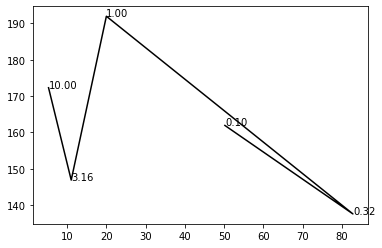

In [37]:
phi = np.array(phi)
fig, ax = plt.subplots()
ax.plot(phi[:,1], phi[:,0], '-k')
for f in range(len(lam_range)):
    ax.text( phi[f,1], phi[f,0], f'{10**lam_range[f]:.2f}')

In [67]:
model = ert.invert(data=data, mesh=inv_mesh,lam=3.14159)#0.85
chi2 = ert.inv.chi2()
print(f'Khi-2: {chi2}')

02/12/20 - 14:12:53 - pyGIMLi - INFO - Found 2 regions.
02/12/20 - 14:12:53 - pyGIMLi - INFO - Region with smallest marker set to background (marker=0)
02/12/20 - 14:12:53 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/12/20 - 14:12:53 - Core - WARNING - Region Nr: 0  is background and should not get a model transformation.
02/12/20 - 14:12:53 - Core - WARNING - Region Nr: 0  is background and should not get a model control.
02/12/20 - 14:12:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/12/20 - 14:12:53 - pyGIMLi - INFO - Starting inversion.
02/12/20 - 14:12:53 - pyGIMLi - INFO - Set default startmodel to median(data values)=9.641117517954825
02/12/20 - 14:12:53 - pyGIMLi - INFO - Created startmodel from forward operator: 532 [9.641117517954825,...,9.641117517954825]


<class 'pygimli.physics.ert.ert.ERTManager'>.applyMesh(methodManager.py:647) : Mesh: Nodes: 431 Cells: 822 Boundaries: 1252
fop: <pygimli.physics.ert.ert.ERTModelling object at 0x7fe0711a0df0>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x7fe0711a01f0>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x7fe0711a0ef0>
min/max (data): 0.011/47.77
min/max (error): 0.011%/47.77%
min/max (start model): 9.64/9.64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 33732842.52 (dPhi = -85.97%) lam: 3.14159
--------------------------------------------------------------------------------
inv.iter 3 ... 

02/12/20 - 14:13:06 - Core - CRITICAL -  response for model with negative or zero resistivity is not defined.: 1.49437e-14 484.309


chi² = 42735979.52 (dPhi = -26.69%) lam: 3.14159
--------------------------------------------------------------------------------
inv.iter 4 ... 

02/12/20 - 14:13:10 - Core - CRITICAL -  response for model with negative or zero resistivity is not defined.: 1.49437e-14 484.309
02/12/20 - 14:13:11 - Core - CRITICAL -  response for model with negative or zero resistivity is not defined.: 1.49437e-14 484.309
02/12/20 - 14:13:13 - Core - CRITICAL -  response for model with negative or zero resistivity is not defined.: 1.49437e-14 484.309


chi² = 42735986.87 (dPhi = -0.0%) lam: 3.14159
################################################################################
#                 Abort criteria reached: dPhi = -0.0 (< 2.0%)                 #
################################################################################
Khi-2: 42735986.868854985


/home/su533162/miniconda3/envs/pg/lib/python3.7/site-packages/pygimli/viewer/mpl/colorbar.py:434: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  mappable.get_cmap().set_bad([1.0, 1.0, 1.0, 0.0])


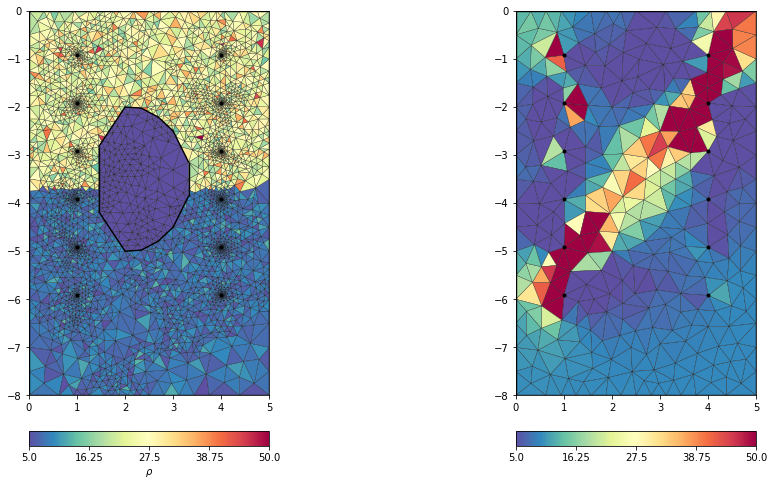

In [68]:
fig, _ = plt.subplots(figsize=(16, 8))
ax1 = plt.subplot(121)
pg.show(fw_mesh, ax=ax1, data=material_properties(fw_mesh), label=r'$\rho$', **show_args)
ax1.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], '.k')
ax2 = plt.subplot(122)
pg.show(ert.paraDomain, data = ert.paraModel(), ax=ax2, **show_args)
ax2.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], '.k')